# Proyecto de Fin de Módulo

**Por**: Sergio Rodrigo Cárdenas Rivera   
**Materia**: Aplicaciones de Ciencias de Datos

## 0. Preparación del entorno

In [2]:
# instalacion de librerias en local
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install scikit-learn
%pip install seaborn
%pip install xgboost
%pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note

In [135]:
# importacion de librerias instaladas para ser utilizadas en todo el proyecto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## 1. Descripción del problema

En este apartado se desarrolla una explicación clara sobre la relevancia del estudio.  
Se tiene información detallada sobre instituciones de educación superior en EEUU., y contiene datos de casi todas las universidades e instituciones de educación superior del país.  
El conjunto de datos incluye datos sobre las tasas de reembolso de préstamos estudiantiles, tasas de graduación, asequibilidad, ingresos después de la graduación y más.  
El objetivo de este conjunto de datos es ayudar a los estudiantes a tomar decisiones informadas sobre su elección universitaria, proporcionándoles información clara y concisa sobre el rendimiento de cada institución.

A continuacion se realiza lo siguiente:

1. Presentación del conjunto de datos, 
2. Numero de columnas y significado de cada una de ellas, 
3. Número número de filas
4. Detalle de variables enteras, reales y de tipo objeto.

Con este estudio se busca responder a lo siguiente:

1. Qué factores explican mejor la tasa de deserciones universitarias?
2. Qué factores explican mejor los ingresos post-graduacion en EEUU?
3. Es posible precedir cuándo un estudiante va abandonar?

In [185]:
path_file = 'data/Most-Recent-Cohorts-Scorecard-Elements.csv'
df = pd.read_csv(path_file)
df.head()

,index,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,0,...,NaN,0.8284,0.1049,30300,0.426,33888,347.789507913825,0.2370456303,NaN,0.32451962616822
1,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,0,...,NaN,0.5214,0.2422,39700,0.665,21941.5,225.183648722001,0.5006735519,NaN,0.54610480182926
2,2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,...,NaN,0.7795,0.8540,40100,0.676,23370,239.844216240146,0.2904884319,NaN,PrivacySuppressed
3,3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,...,NaN,0.4596,0.2640,45500,0.668,24097,247.305352106924,0.5278022948,NaN,0.47240649606299
4,4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,...,NaN,0.7554,0.1270,26600,0.36,33118.5,339.892198354698,0.1855174624,NaN,0.2574049608355


In [186]:
print("DataFrame Info:")
print(df.info())

colsFloat64 = df.select_dtypes(include=['float64']).columns
colsInt64 = df.select_dtypes(include=['int64']).columns
colsObject = df.select_dtypes(include=['object']).columns

dataDesc = pd.DataFrame({
    'Data Type': ['float64', 'integer64', 'object'],
    'Count': [
        len(colsFloat64), 
        len(colsInt64),
        len(colsObject)
    ]
})
dataDesc

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Columns: 123 entries, index to C150_4_POOLED_SUPP
dtypes: float64(103), int64(8), object(12)
memory usage: 7.2+ MB
None


,Data Type,Count
0,float64,103
1,integer64,8
2,object,12


Se tiene 7703 registros de diferentes instituciones y 123 columnas, donde 12 son categoricas o cadenas que no aportan significancia para el estudio.

In [153]:
colsFloat64.to_list()

['LOCALE',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',
 'PCIP41',
 'PCIP42',
 'PCIP43',
 'PCIP44',
 'PCIP45',
 'PCIP46',
 'PCIP47',
 'PCIP48',
 'PCIP49',
 'PCIP50',
 'PCIP51',
 'PCIP52',
 'PCIP54',
 'DISTANCEONLY',
 'UGDS',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'PPTUG_EF',
 'NPT4_PUB

In [154]:
colsInt64.to_list()

['index',
 'UNITID',
 'OPEID',
 'OPEID6',
 'HCM2',
 'PREDDEG',
 'CONTROL',
 'CURROPER']

In [155]:
colsObject.to_list()

['INSTNM',
 'CITY',
 'STABBR',
 'INSTURL',
 'NPCURL',
 'MD_EARN_WNE_P10',
 'GT_25K_P6',
 'GRAD_DEBT_MDN_SUPP',
 'GRAD_DEBT_MDN10YR_SUPP',
 'RPY_3YR_RT_SUPP',
 'C150_L4_POOLED_SUPP',
 'C150_4_POOLED_SUPP']

Para entender la estructura de este conjunto de datos se detalla el significado de cada uno de las variables presentes en el mismo. Se lograron identificar familias de variables detalladas a continuación:

1. **Identificación y localización**                                  

* **UNITID**: identificador único de IPEDS para la institución.
* **OPEID / OPEID6**: ID de la Office of Postsecondary Education (8 y 6 dígitos).
* **INSTNM, CITY, STABBR**: nombre, ciudad y estado (abreviatura) de la institución.
* **INSTURL / NPCURL**: web oficial / URL del Net Price Calculator. 


2. **Naturaleza de la institución**

* **CONTROL**: control de la institución (1 pública, 2 privada sin fines de lucro, 3 privada con fines de lucro).
* **PREDDEG**: título predominante que otorga (codificado según IPEDS/NSLDS; 0–4, p. ej. certificados, asociado, bachillerato, posgrado).
* **LOCALE**: código de entorno (urbano/suburbano/rural por tamaño).
* **HBCU, PBI, ANNHI, TRIBAL, AANAPII, HSI, MENONLY, WOMENONLY, RELAFFIL**: banderas de misión/afiliación (históricas/demográficas) y afiliación religiosa (códigos). 

3. **Admisión y tamaño**

* **ADM_RATE**: tasa de admisión (0–1).
* **SAT_AVG** (si está): promedio SAT admitidos.
* **UGDS**: matrícula de pregrado (headcount). 

4. **Costos y precio neto**
* **TUITIONFEE_IN / TUITIONFEE_OUT**: matrícula residentes/no residentes (USD).
* **NPT4_PUB / NPT4_PRIV y NPT41–NPT45**: precio neto promedio para quintiles de ingreso (por tipo de control). Ej.: NPT41_PRIV = precio neto promedio (ingresos más bajos) en privadas sin fines de lucro. 

5. **Ayuda financiera y composición**

* **PCTPELL**: % de estudiantes con Pell Grant.
* **PCTFLOAN**: % con préstamos federales.
* **UG25ABV**: % de alumnos ≥25 años. 

6. **Retención y graduación**

* **RET_FT4 / RET_PT4**: retención de tiempo completo / parcial (instituciones 4 años).
* **RET_FTL4 / RET_PTL4**: idem para <4 años.
* **C150_4_POOLED_SUPP / C150_L4_POOLED_SUPP**: graduación a 150% del tiempo (4 años / <4 años), valores “SUPP” si están suprimidos. 
?
7. **Deuda y repago**

* **GRAD_DEBT_MDN_SUPP**: deuda mediana acumulada de graduados (suprimida si corresponde).
* **GRAD_DEBT_MDN10YR_SUPP**: pago mensual estimado a 10 años sobre la deuda mediana (suprimido si corresponde).
* **RPY_3YR_RT_SUPP**: tasa de repago a 3 años (suprimida si corresponde). 

8. **Ingresos y umbrales**

* **MD_EARN_WNE_P10**: ingresos anuales medianos 10 años después de la entrada (trabajando y no inscritos).
* **GT_25K_P6**: % con ingresos > USD 25k a los 6 años desde la entrada.

In [187]:
# Se define las columnas que se van a seleccionar
selected_columns = [
    'INSTNM', # Instituion name 
    'CITY',   # city
    'C150_4_POOLED_SUPP',  # Completion rate
    'MD_EARN_WNE_P10',     # Median earnings 10 years after entry
    'UGDS',                # Undergrad population
    'RET_FT4',             # Retention rate, full-time
    'RET_PTL4',            # Retention rate, part time
    'RPY_3YR_RT_SUPP'      # Repayment rate
]

# Se crea un nuevo dataframe a partir del dataframe original
df_selected = df[selected_columns].copy()

# Se renombra las columnas para fines de lectura
df_selected = df_selected.rename(columns={
    'INSTNM': 'institution_name', # Instituion name 
    'CITY': 'city',   # city
    'C150_4_POOLED_SUPP': 'completion_rate',
    'MD_EARN_WNE_P10': 'median_earnings_10yr',
    'UGDS': 'undergrad_population',
    'RET_FT4': 'retention_rate_ft',
    'RET_PTL4': 'retention_rate_pt',
    'RPY_3YR_RT_SUPP': 'repayment_rate_3yr'
})

selected_columns = df_selected.columns.to_list()

df_selected

,institution_name,city,completion_rate,median_earnings_10yr,undergrad_population,retention_rate_ft,retention_rate_pt,repayment_rate_3yr
0,Alabama A & M University,Normal,0.32451962616822,30300,4206.0,0.6595,NaN,0.2370456303
1,University of Alabama at Birmingham,Birmingham,0.54610480182926,39700,11383.0,0.8288,NaN,0.5006735519
2,Amridge University,Montgomery,PrivacySuppressed,40100,291.0,0.0000,NaN,0.2904884319
3,University of Alabama in Huntsville,Huntsville,0.47240649606299,45500,5451.0,0.7696,NaN,0.5278022948
4,Alabama State University,Montgomery,0.2574049608355,26600,4811.0,0.5725,NaN,0.1855174624
...,...,...,...,...,...,...,...,...
7698,Rasmussen College - Overland Park,Overland Park,NaN,NaN,NaN,NaN,NaN,0.2840145103
7699,National Personal Training Institute of Cleveland,Highland Heights,NaN,NaN,NaN,NaN,NaN,NaN
7700,Bay Area Medical Academy - San Jose Satellite ...,San Jose,NaN,NaN,NaN,NaN,NaN,NaN
7701,High Desert Medical College,Lancaster,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
#Metodo para mostrar información sobre valores
def build_df_with_null_and_invalid_values_prt_info(dataframe)->None:
    privacy_suppressed_counts = (dataframe == 'PrivacySuppressed').sum()
    privacy_suppressed_pct = (privacy_suppressed_counts / len(dataframe) * 100).round(2)

    info = pd.DataFrame({
        "column": dataframe.columns,
        "dtype": dataframe.dtypes.astype(str),
        "non_null": dataframe.notna().sum().values,
        "nulls": dataframe.isna().sum().values,
        "pct_null": (dataframe.isna().sum().values / len(dataframe) * 100).round(2),
        "privacy_suppressed": privacy_suppressed_counts.values,
        "pct_privacy_suppressed": privacy_suppressed_pct.values,
    }).sort_values("column").reset_index(drop=True)
    return info

In [189]:
df_info = build_df_with_null_and_invalid_values_prt_info(dataframe=df_selected)
df_info

,column,dtype,non_null,nulls,pct_null,privacy_suppressed,pct_privacy_suppressed
0,city,object,7703,0,0.00,0,0.00
1,completion_rate,object,2497,5206,67.58,116,1.51
2,institution_name,object,7703,0,0.00,0,0.00
3,median_earnings_10yr,object,6534,1169,15.18,841,10.92
4,repayment_rate_3yr,object,6801,902,11.71,573,7.44
5,retention_rate_ft,float64,2293,5410,70.23,0,0.00
6,retention_rate_pt,float64,2208,5495,71.34,0,0.00
7,undergrad_population,float64,6990,713,9.26,0,0.00


In [190]:

def show_bar_plot_with_null_and_invalid_values_prt_info(dataframe) -> None:
    top_missing = dataframe.sort_values("pct_null", ascending=False)
    plt.figure(figsize=(12,7))

    plt.barh(top_missing["column"], top_missing["pct_null"], label="Missing (%)", color="blue")
    plt.barh(
        top_missing["column"], top_missing["pct_privacy_suppressed"],
        left=top_missing["pct_null"], 
        label="Privacy Suppressed (%)", color="skyblue")

    plt.gca().invert_yaxis()
    plt.title("Porcentaje de faltantes por columna")
    plt.xlabel("% faltantes")
    plt.ylabel("Variables")
    plt.legend(loc="lower right")  # Add legend
    plt.tight_layout()
    plt.show()

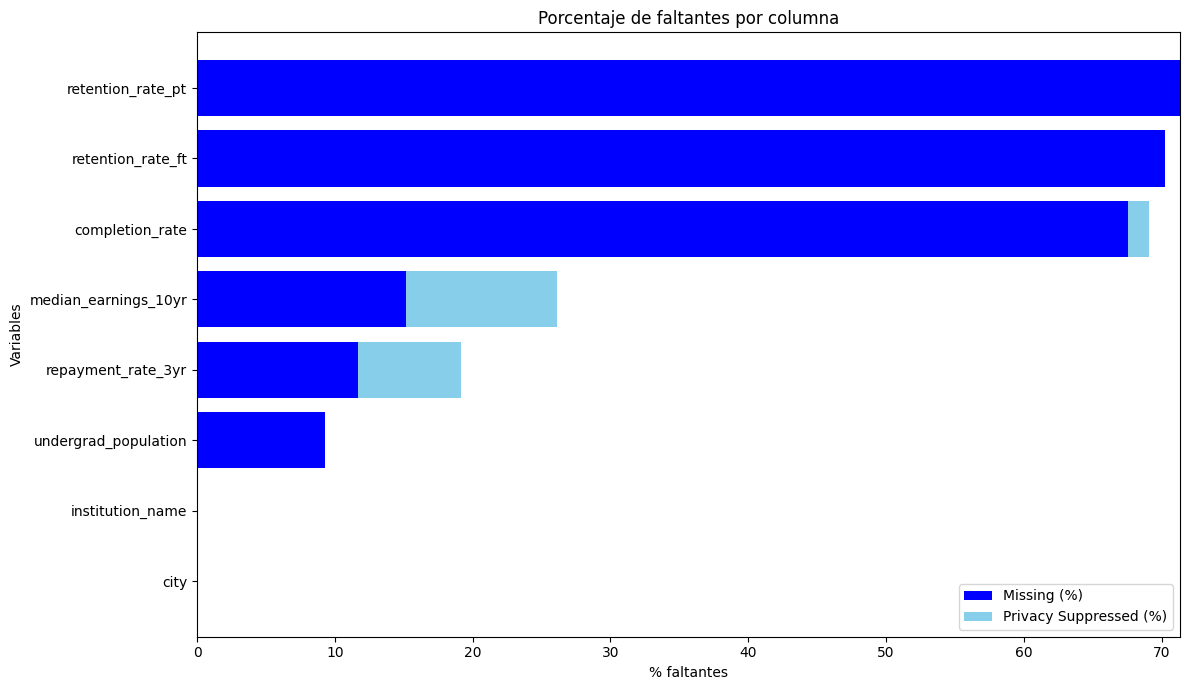

In [191]:
show_bar_plot_with_null_and_invalid_values_prt_info(dataframe=df_info)

## 2. Análisis explorativo de datos (EDA)

Después de analizar el conjunto de datos, se puede ver graficamente que se tiene un porcentaje importante de valores nulos y valores eliminados por tema de privacidad, debido a que esos valores eran muy pequeños. A continuacion se realizan las siguientes tareas.

1. Limpieza del conjunto de datos
2. Exploración de correlaciones
3. Análisis de correlaciones
4. Detección de outliers
5. Normalización

In [192]:
df_selected.columns

Index(['institution_name', 'city', 'completion_rate', 'median_earnings_10yr',
       'undergrad_population', 'retention_rate_ft', 'retention_rate_pt',
       'repayment_rate_3yr'],
      dtype='object')

In [194]:
# Replace 'PrivacySuppressed' with 0
df_selected = df_selected.replace('PrivacySuppressed', 0)

# Convert columns to numeric, coercing errors to NaN
avoid = ['institution_name', 'city']
for col in df_selected.columns:
    if col not in avoid:
        df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

# Impute NaN values with the mean of each column
cols_to_fill = [col for col in df_selected.columns if col not in avoid]
df_selected[cols_to_fill] = df_selected[cols_to_fill].fillna(df_selected[cols_to_fill].mean())

In [195]:
df_info = build_df_with_null_and_invalid_values_prt_info(dataframe=df_selected)
df_info

,column,dtype,non_null,nulls,pct_null,privacy_suppressed,pct_privacy_suppressed
0,city,object,7703,0,0.0,0,0.0
1,completion_rate,float64,7703,0,0.0,0,0.0
2,institution_name,object,7703,0,0.0,0,0.0
3,median_earnings_10yr,float64,7703,0,0.0,0,0.0
4,repayment_rate_3yr,float64,7703,0,0.0,0,0.0
5,retention_rate_ft,float64,7703,0,0.0,0,0.0
6,retention_rate_pt,float64,7703,0,0.0,0,0.0
7,undergrad_population,float64,7703,0,0.0,0,0.0


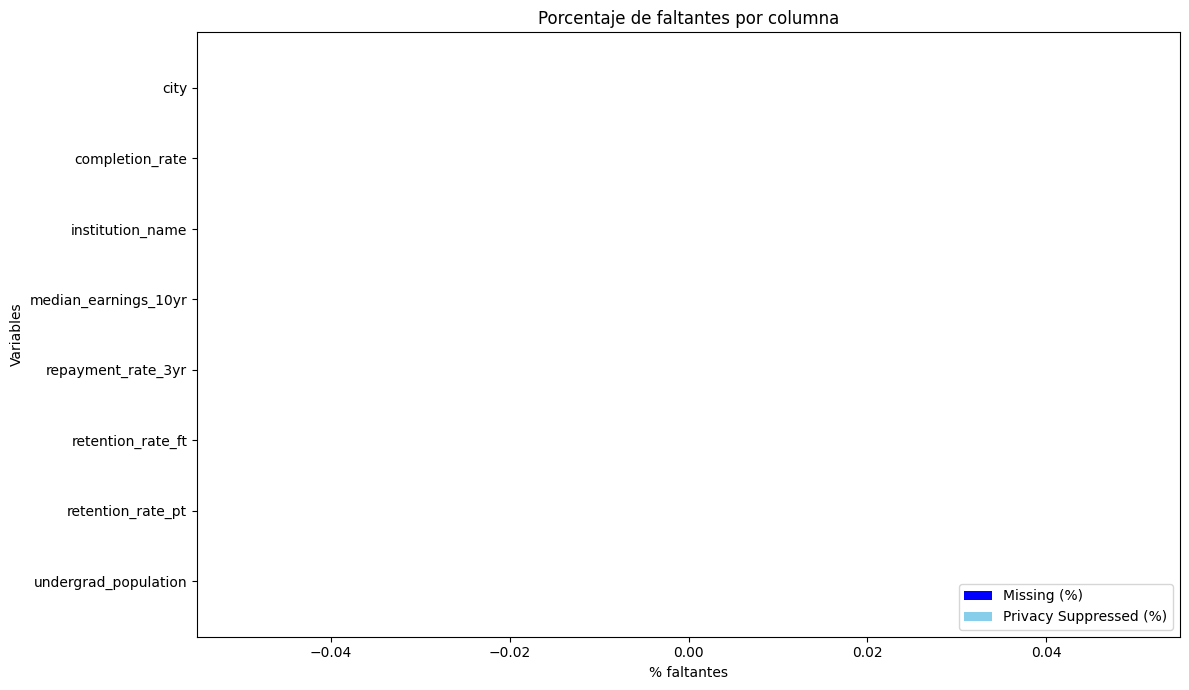

In [196]:
show_bar_plot_with_null_and_invalid_values_prt_info(dataframe=df_info)

In [197]:
df_selected.to_csv('./data/data_togpt.csv')
df_selected

,institution_name,city,completion_rate,median_earnings_10yr,undergrad_population,retention_rate_ft,retention_rate_pt,repayment_rate_3yr
0,Alabama A & M University,Normal,0.324520,30300.000000,4206.000000,0.659500,0.564679,0.237046
1,University of Alabama at Birmingham,Birmingham,0.546105,39700.000000,11383.000000,0.828800,0.564679,0.500674
2,Amridge University,Montgomery,0.000000,40100.000000,291.000000,0.000000,0.564679,0.290488
3,University of Alabama in Huntsville,Huntsville,0.472406,45500.000000,5451.000000,0.769600,0.564679,0.527802
4,Alabama State University,Montgomery,0.257405,26600.000000,4811.000000,0.572500,0.564679,0.185517
...,...,...,...,...,...,...,...,...
7698,Rasmussen College - Overland Park,Overland Park,0.457745,28621.395776,2332.158941,0.707081,0.564679,0.284015
7699,National Personal Training Institute of Cleveland,Highland Heights,0.457745,28621.395776,2332.158941,0.707081,0.564679,0.382086
7700,Bay Area Medical Academy - San Jose Satellite ...,San Jose,0.457745,28621.395776,2332.158941,0.707081,0.564679,0.382086
7701,High Desert Medical College,Lancaster,0.457745,28621.395776,2332.158941,0.707081,0.564679,0.382086


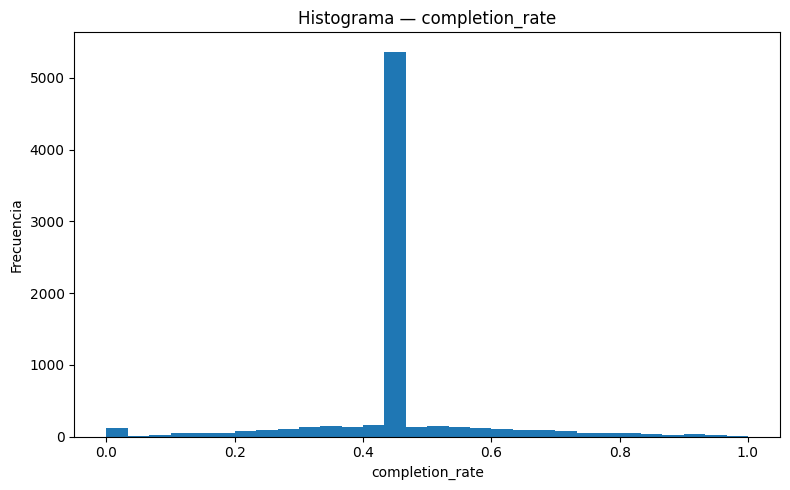

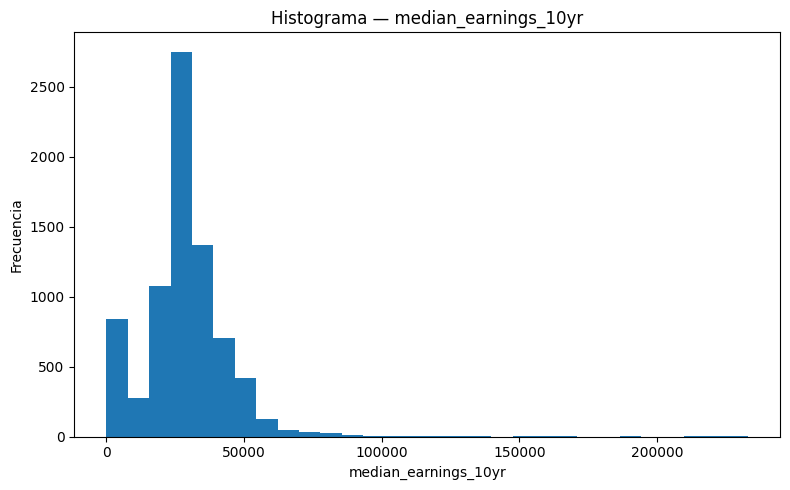

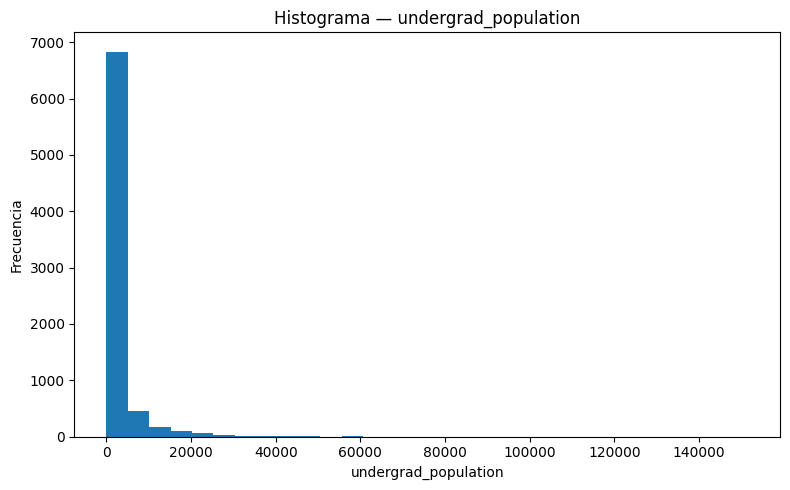

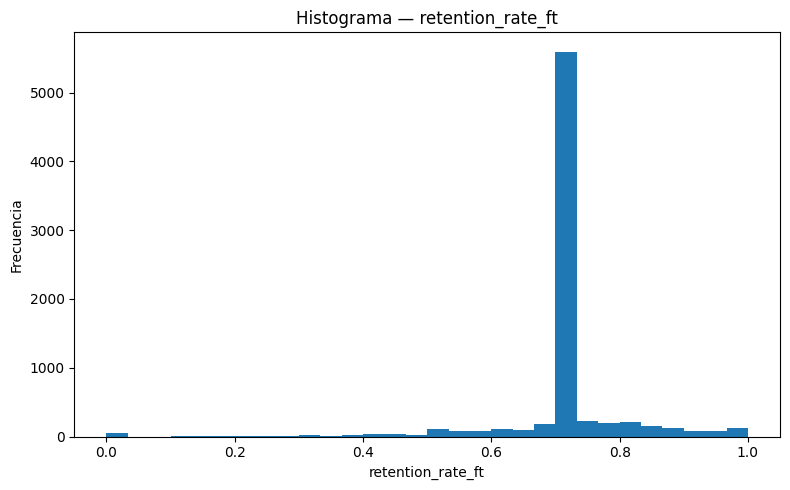

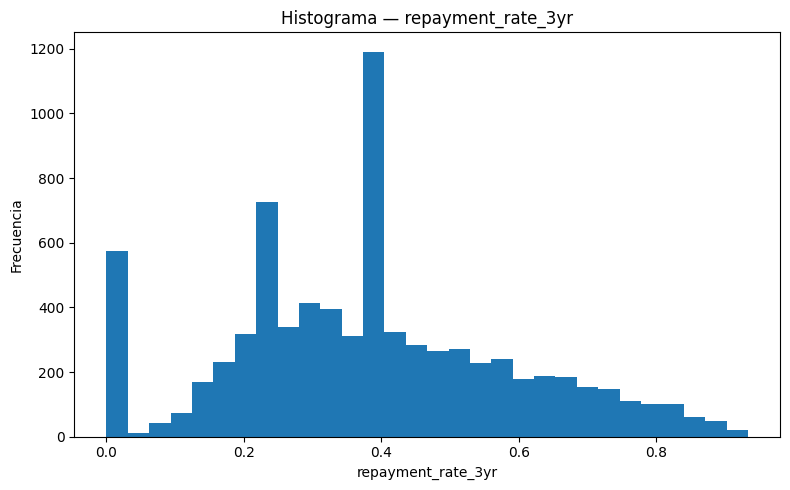

In [107]:
def histcol(col, dataframe, bins=30):
    plt.figure(figsize=(8,5))
    plt.hist(dataframe[col], bins=bins)
    plt.title(f"Histograma — {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

for col in selected_columns:
    histcol(col, dataframe=df_selected)

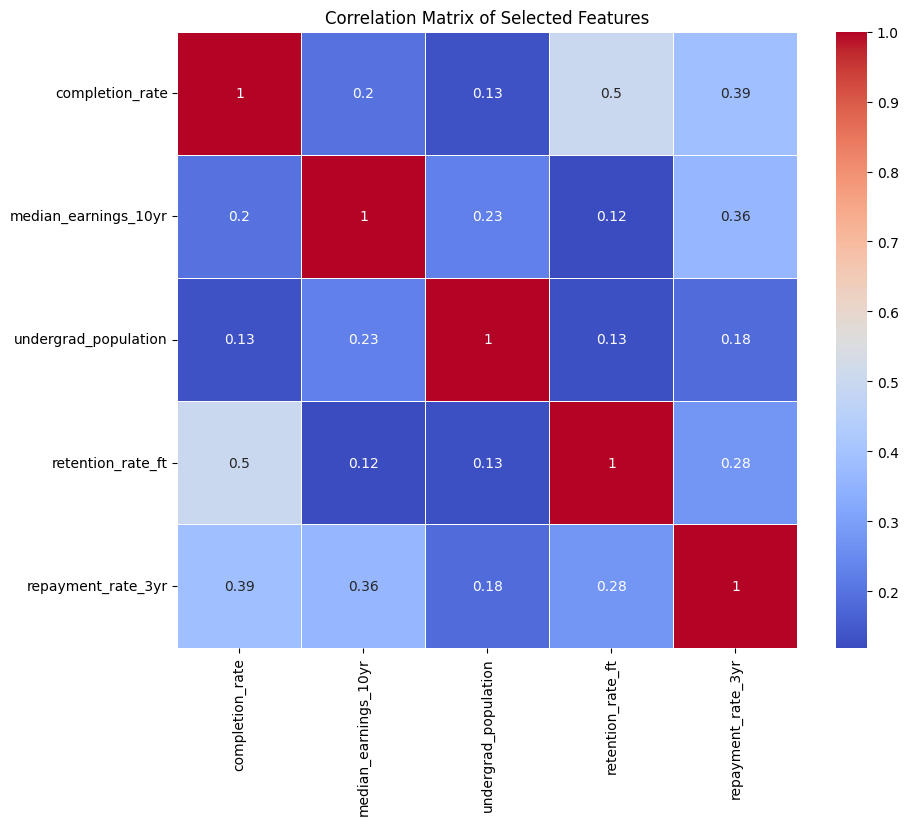

In [93]:
correlation_matrix = df_selected.corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [95]:
# 2. Outlier Detection
# Use Isolation Forest to detect outliers
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(df_selected)

# Predict outliers
outliers = model.predict(df_selected)

# Add outliers to the DataFrame
df_selected['outlier'] = outliers

# Filter outliers
df_outliers = df_selected[df_selected['outlier'] == -1]

# Print the number of outliers
print(f"Number of outliers: {len(df_outliers)}")

Number of outliers: 1028


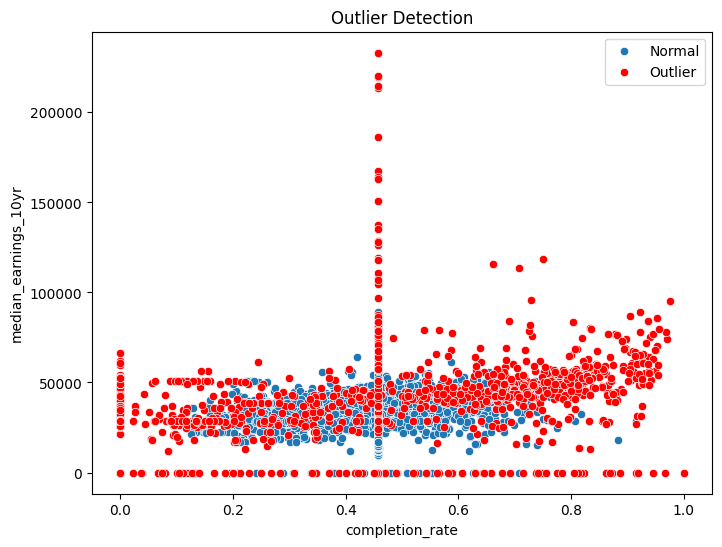

In [96]:
# Visualize outliers (example: scatter plot of two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='completion_rate', y='median_earnings_10yr', data=df_selected[df_selected['outlier'] == 1], label='Normal')
sns.scatterplot(x='completion_rate', y='median_earnings_10yr', data=df_selected[df_selected['outlier'] == -1], color='red', label='Outlier')
plt.title('Outlier Detection')
plt.legend()
plt.show()


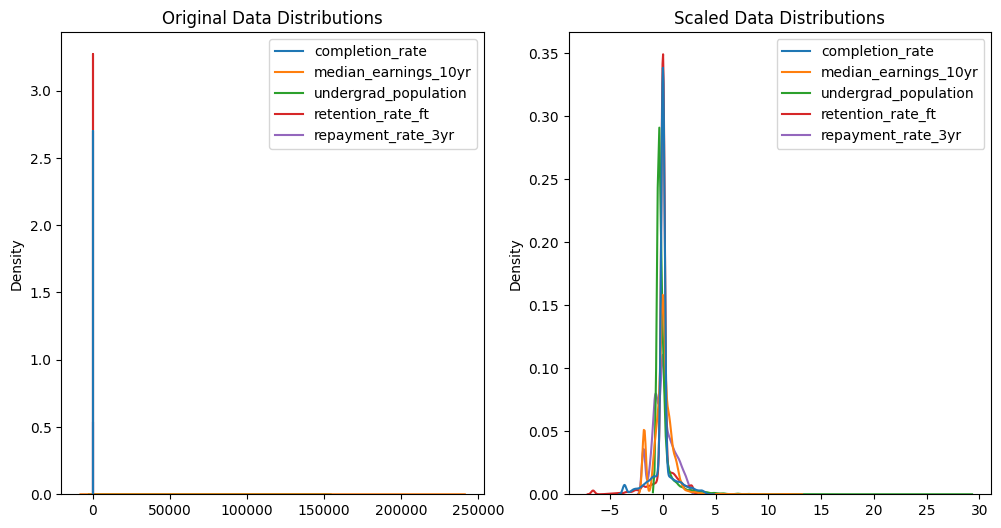

In [97]:
# 3. Normalization
# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected.drop('outlier', axis=1)), columns=df_selected.columns[:-1])

# Plot the distributions of the original and scaled data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_selected.drop('outlier', axis=1))
plt.title("Original Data Distributions")
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_scaled)
plt.title("Scaled Data Distributions")
plt.show()

In [99]:
df_scaled.head()

,completion_rate,median_earnings_10yr,undergrad_population,retention_rate_ft,repayment_rate_3yr
0,-1.062158,0.104190,0.361700,-0.445848,-0.700786
1,0.704460,0.687641,1.747046,1.140546,0.572971
2,-3.649436,0.712469,-0.393996,-6.625569,-0.442569
3,0.116890,1.047643,0.602017,0.585824,0.704048
4,-1.597239,-0.125467,0.478480,-1.261065,-0.949752


## 3. Modelado

Planteamiento de modelos de Machine Learning tanto básicos y avanzados, y de Deep Learning.

1. ML Básico: Regresión Lineal y Logística (implementación y justifición)
2. ML Avanzado: Random Forest, XBost (optmización y mejora)
3. DL: Redes neuronales densas (arquitectura y entrenamiento)

## Machine Learning Básico

#### Regresion Lineal

In [119]:
# --- Linear Regression ---
# Target variable: completion_rate
# Features: All other columns

# Prepare data for Linear Regression
X_linear = df_selected.drop('completion_rate', axis=1)
y_linear = df_selected['completion_rate']

# Split data into training and testing sets
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

In [120]:
# Uncommment this!!!
# Scale the data
# scaler_linear = StandardScaler()
# X_linear_train_scaled = scaler_linear.fit_transform(X_linear_train)
# X_linear_test_scaled = scaler_linear.transform(X_linear_test)

In [121]:
# Train the Linear Regression model
linear_model = LinearRegression()
# linear_model.fit(X_linear_train_scaled, y_linear_train)
linear_model.fit(X_linear_train, y_linear_train)

# Make predictions
# y_linear_pred = linear_model.predict(X_linear_test_scaled)
y_linear_pred = linear_model.predict(X_linear_test)

# Evaluate the model
mse_linear = mean_squared_error(y_linear_test, y_linear_pred)
print(f"Linear Regression Mean Squared Error (MSE): {mse_linear}")


Linear Regression Mean Squared Error (MSE): 0.009657220869946106


Explanation and Justification:
Linear Regression is used to predict a continuous target variable (completion_rate) based on a linear combination of features.
Justification: It's a simple and interpretable model that can provide a baseline for predicting completion rates.
Scaling is important for Linear Regression to ensure that features with larger scales do not dominate the results.
MSE is used to evaluate the model, which measures the average squared difference between predicted and actual values.


#### Regresión Logística

In [122]:
# --- Logistic Regression ---
# Target variable: repayment_rate_3yr (converted to binary)
# Features: All other columns

# Prepare data for Logistic Regression
# Create a binary target variable: 1 if repayment_rate_3yr >= threshold, 0 otherwise
threshold = df_selected['repayment_rate_3yr'].median()  # Example: use the median as the threshold
df_selected['repayment_success'] = (df_selected['repayment_rate_3yr'] >= threshold).astype(int)

X_logistic = df_selected.drop(['repayment_rate_3yr', 'repayment_success'], axis=1)
y_logistic = df_selected['repayment_success']

# Split data into training and testing sets
X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test = train_test_split(
    X_logistic, y_logistic, test_size=0.2, random_state=42
)

In [123]:
# Scale the data
# scaler_logistic = StandardScaler()
# X_logistic_train_scaled = scaler_logistic.fit_transform(X_logistic_train)
# X_logistic_test_scaled = scaler_logistic.transform(X_logistic_test)

In [124]:
# Train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
# logistic_model.fit(X_logistic_train_scaled, y_logistic_train)
logistic_model.fit(X_logistic_train, y_logistic_train)

# Make predictions
# y_logistic_pred = logistic_model.predict(X_logistic_test_scaled)
y_logistic_pred = logistic_model.predict(X_logistic_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_logistic_test, y_logistic_pred)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")


Logistic Regression Accuracy: 0.6145360155743024


/Users/sergiorodrigo/Documents/GitHub/srodrigo23/maestria/proy_mod12/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Explanation and Justification:
Logistic Regression is used to predict a binary target variable (repayment_success) based on a linear combination of features.
Justification: It's a simple and interpretable model that can provide a baseline for predicting the probability of repayment success.
A threshold is used to convert the continuous repayment_rate_3yr into a binary variable.
Accuracy is used to evaluate the model, which measures the proportion of correctly classified instances.
Scaling is important for Logistic Regression to ensure that features with larger scales do not dominate the results.

### Machine Learning Avanzado

In [136]:
# --- Prepare Data ---
# Create binary target for classification (repayment_success)
threshold = df_selected['repayment_rate_3yr'].median()
df_selected['repayment_success'] = (df_selected['repayment_rate_3yr'] >= threshold).astype(int)

# Regression Data (RandomForestRegressor)
X_reg = df_selected.drop(['completion_rate', 'repayment_success', 'repayment_rate_3yr'], axis=1)
y_reg = df_selected['completion_rate']

# Classification Data (RandomForestClassifier)
X_clf = df_selected.drop(['repayment_success', 'repayment_rate_3yr', 'completion_rate'], axis=1)
y_clf = df_selected['repayment_success']

# Segmentation Data (KMeans) - Use all features
X_seg = df_selected.drop(['repayment_success', 'repayment_rate_3yr', 'completion_rate'], axis=1)

# Split data
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
X_seg_train, X_seg_test = train_test_split(X_seg, test_size=0.2, random_state=42)


In [ ]:
# Scale the data
# scaler_reg = StandardScaler()
# X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
# X_reg_test_scaled = scaler_reg.transform(X_reg_test)

# scaler_clf = StandardScaler()
# X_clf_train_scaled = scaler_clf.fit_transform(X_clf_train)
# X_clf_test_scaled = scaler_clf.transform(X_clf_test)

# scaler_seg = StandardScaler()
# X_seg_train_scaled = scaler_seg.fit_transform(X_seg_train)
# X_seg_test_scaled = scaler_seg.transform(X_seg_test)

In [ ]:

results = []  

In [138]:
# 1. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_reg_train_scaled, y_reg_train)
y_reg_pred = rf_reg.predict(X_reg_test_scaled)
mse = mean_squared_error(y_reg_test, y_reg_pred)
results.append(['RandomForestRegressor', 'Regression', mse, None, None, None, None])

In [139]:
# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_clf_train_scaled, y_clf_train)
y_clf_pred = rf_clf.predict(X_clf_test_scaled)
accuracy = accuracy_score(y_clf_test, y_clf_pred)
roc_auc = roc_auc_score(y_clf_test, y_clf_pred)
precision = precision_score(y_clf_test, y_clf_pred)
recall = recall_score(y_clf_test, y_clf_pred)
f1 = f1_score(y_clf_test, y_clf_pred)
results.append(['RandomForestClassifier', 'Classification', None, accuracy, roc_auc, precision, recall, f1])

In [140]:
# --- Create Results DataFrame ---
results_df = pd.DataFrame(results, columns=[
    'Model', 'Type', 'MSE', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score', 'Silhouette Score'
])

print(results_df)


ValueError: 9 columns passed, passed data had 8 columns

## 4. Evaluación

Análisis de métricas RMSE, AUC, RECALL, Precisión, etc.

## 5. Conclusiones

1. Confiabilidad del modelo, Razón.
2. Aplicabilidad del modelo
3. Impacto del modelo generado